# WeatherPy
----

#### Note
* Written by George Bigham 7/26/19


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
download_date = datetime.today().strftime('%m/%d/%y')

batch_size = 50
n_batches = len(cities)//batch_size+1

cities_df = pd.DataFrame(columns = ['City', 'Country', 
                                    'Lat', 'Lng',  'Date', 
                                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed'])

print("Beginning Data Retrieval")
print("------------------------")

for j in range(n_batches):
    i = 0
    while i < 50:
        x = j*batch_size+i
        if x >= len(cities): break
        query_url = query_url = f"{url}appid={api_key}&units={units}&q={cities[x]}"
        response = requests.get(query_url)
        json_response = response.json()
    
        if json_response['cod']=='404':
            print(cities[i]+" not found, skipping...")
        else:
            print("Processing Record "+str(i+1)+ " of Set "+str(j+1)+" | " + cities[x])
        
            cities_df.loc[x] = [cities[x],
                                json_response['sys']['country'],
                                json_response['coord']['lat'],
                                json_response['coord']['lon'],
                                json_response['sys']['sunrise'],
                                json_response['main']['temp_max'], 
                                json_response['main']['humidity'], 
                                json_response['clouds']['all'],
                                json_response['wind']['speed']]

        i+=1
        

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | nueva rosita
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | sinnamary
Processing Record 7 of Set 1 | tosno
Processing Record 8 of Set 1 | verkhnevilyuysk
Processing Record 9 of Set 1 | magdalena
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | portland
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | canto do buriti
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | port-cartier
Processing Record 17 of Set 1 | liaozhong
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | maple creek
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | tricase
Processing Record 22 of Set 1 | pisco
Processing Record 23 of Set 

Processing Record 1 of Set 5 | nizwa
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | strezhevoy
Processing Record 4 of Set 5 | melfi
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | torbay
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set 5 | veraval
Processing Record 9 of Set 5 | soltsy
Processing Record 10 of Set 5 | pascagoula
Processing Record 11 of Set 5 | nicoya
Processing Record 12 of Set 5 | yongan
canto do buriti not found, skipping...
Processing Record 14 of Set 5 | konevo
Processing Record 15 of Set 5 | iraquara
Processing Record 16 of Set 5 | naryan-mar
Processing Record 17 of Set 5 | norman wells
nemuro not found, skipping...
Processing Record 19 of Set 5 | semey
Processing Record 20 of Set 5 | saveh
Processing Record 21 of Set 5 | ponta delgada
Processing Record 22 of Set 5 | dickinson
Processing Record 23 of Set 5 | sobolevo
Processing Record 24 of Set 5 | praya
Processing Record 25 of Set 5 | kijang
Proces

Processing Record 7 of Set 9 | garowe
verkhnevilyuysk not found, skipping...
Processing Record 9 of Set 9 | nantucket
Processing Record 10 of Set 9 | molchanovo
Processing Record 11 of Set 9 | enid
Processing Record 12 of Set 9 | dabat
Processing Record 13 of Set 9 | bodaybo
Processing Record 14 of Set 9 | thompson
Processing Record 15 of Set 9 | akil
Processing Record 16 of Set 9 | freeport
Processing Record 17 of Set 9 | qasigiannguit
nemuro not found, skipping...
Processing Record 19 of Set 9 | witu
souillac not found, skipping...
tricase not found, skipping...
Processing Record 22 of Set 9 | kudahuvadhoo
Processing Record 23 of Set 9 | madison
nokaneng not found, skipping...
Processing Record 25 of Set 9 | somerset
Processing Record 26 of Set 9 | flin flon
Processing Record 27 of Set 9 | bilma
Processing Record 28 of Set 9 | at-bashi
Processing Record 29 of Set 9 | saldanha
bay roberts not found, skipping...
Processing Record 31 of Set 9 | toumodi
jamestown not found, skipping...
a

Processing Record 7 of Set 13 | gorontalo
Processing Record 8 of Set 13 | penzance
Processing Record 9 of Set 13 | buritizeiro
bethel not found, skipping...
Processing Record 11 of Set 13 | yegorlykskaya
Processing Record 12 of Set 13 | flinders
Processing Record 13 of Set 13 | funchal
Processing Record 14 of Set 13 | garbolovo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df.to_csv(output_data_file, encoding='utf-8', index=False)

In [5]:
cities_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,cape town,ZA,-33.93,18.42,1564119809,55,100,40,2.24
1,te anau,NZ,-45.41,167.72,1564172027,45.7,89,100,6.67
2,nueva rosita,MX,27.94,-101.22,1564142643,92.86,28,1,13.51
3,leningradskiy,RU,69.38,178.42,1564145998,35.62,95,100,15.32
4,qaanaaq,GL,77.48,-69.36,0,49.66,39,55,4.92


In [6]:
cities_df.count()

City          549
Country       549
Lat           549
Lng           549
Date          549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

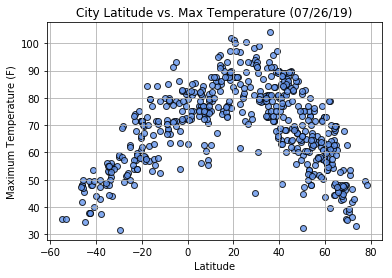

In [7]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], color='cornflowerblue', edgecolors='k', alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({download_date})") 
plt.show()

#### Latitude vs. Humidity Plot

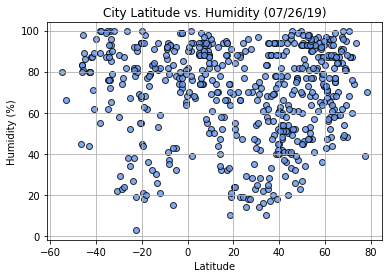

In [8]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'], color='cornflowerblue', edgecolors='k', alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(top=104)
plt.title(f"City Latitude vs. Humidity ({download_date})") 
plt.show()

#### Latitude vs. Cloudiness Plot

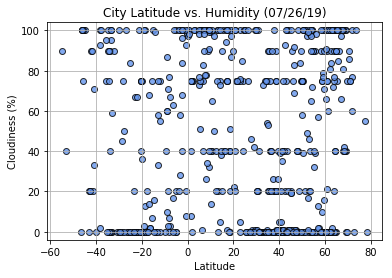

In [9]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], color='cornflowerblue', edgecolors='k', alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(bottom=-4, top=104)
plt.title(f"City Latitude vs. Humidity ({download_date})") 
plt.show()

#### Latitude vs. Wind Speed Plot

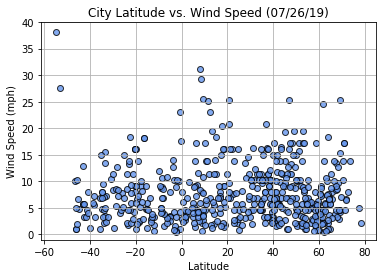

In [10]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], color='cornflowerblue', edgecolors='k', alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(bottom=-1)
plt.title(f"City Latitude vs. Wind Speed ({download_date})") 
plt.show()